# 1. Аннотация
В данной работе c помощью сцинтилляционного счетчика измеряются линейные коэф- фициенты
ослабления потока 𝛾-лучей в свинце, железе и алюминии. По результатам опытов по их величине опреде-
ляется энергия 𝛾-квантов

# 2. Теоретические сведения
В письменном виде на планшете, написал при подготовке к выполнению. Прошу прощения, что не переоформил в ноутбуке печатно, но я проболел все выходные и сил переводить это в печатный вид у меня не было. Последующие работы будут выполнены полностью в jupiter-style.

# 3. Результаты и измерения

In [43]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [44]:
def gen_L(values, repeats):
    res = []
    for i in values:
        res += [i] * repeats
    return res

def gen_arr(arr, n):
    res = []
    for i in range(int(len(arr) / n)):
        sum = 0
        for k in range(n):
            sum += arr[i*n + k]
        res += [int(sum / n)]
    return res

def avg_data(df, arr, n):
    df['N'] = gen_arr(arr, n)
    res = []
    for i in range(int(len(arr) / n)):
        sum = 0
        for k in range(n):
            sum += (arr[i*n + k] - df['N'][i]) ** 2
        # print(sum, sum / (n - 1), math.sqrt(sum / (n - 1)))
        res += [math.sqrt(sum / n)]
    df['delta N'] = res

def calculation(df, N_0):
    # | ln(N0 / N) |
    df['ln(N0/N)'] = [abs(math.log(N_0 / i)) for i in df['N']]
    # delta

def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_ylabel(name_y)
    ax.set_xlabel(name_x)
    return ax

def drow_line(ax_cur, x, y, x_err, y_err, line_color):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    ax_cur.plot(x, ya, linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    print(k, '(' + line_color + ')')

In [45]:
N0 = 783113 # Среднее значение излучения в отсутствие поглотителя
delta_N0 = 3605

n = 1962 # Фоновое излучение
delta_n = 170

# Alluminium
DF_al = pd.DataFrame()
DF_al['L'] = [2, 4, 6, 8, 10]  # cm
avg_data(DF_al, [520292, 518902, 518122, 342388, 342154, 343751, 229482, 229321, 230085, 154369, 154362, 153948, 103824, 104072, 103415], 3)

# Ferrum
DF_fe = pd.DataFrame()
DF_fe['L'] = [0.5, 1, 1.50, 2, 3]  # cm
avg_data(DF_fe, [423328, 422297, 236878, 237716, 138802, 138895, 82452, 82105, 30272, 30543], 2)

# Plumbum
DF_pb = pd.DataFrame()
DF_pb['L'] = [1, 2, 3, 4, 5]  # cm
avg_data(DF_pb, [440050, 440795, 440625, 248481, 248811, 249496, 142093, 142880, 142430, 82721, 82315, 82186, 48690, 48305, 48664], 3)

In [46]:
calculation(DF_al, N0)
calculation(DF_fe, N0)
calculation(DF_pb, N0)

4.976593788873124 (blue)
0.9522339757487035 (red)
1.8125417513453659 (brown)


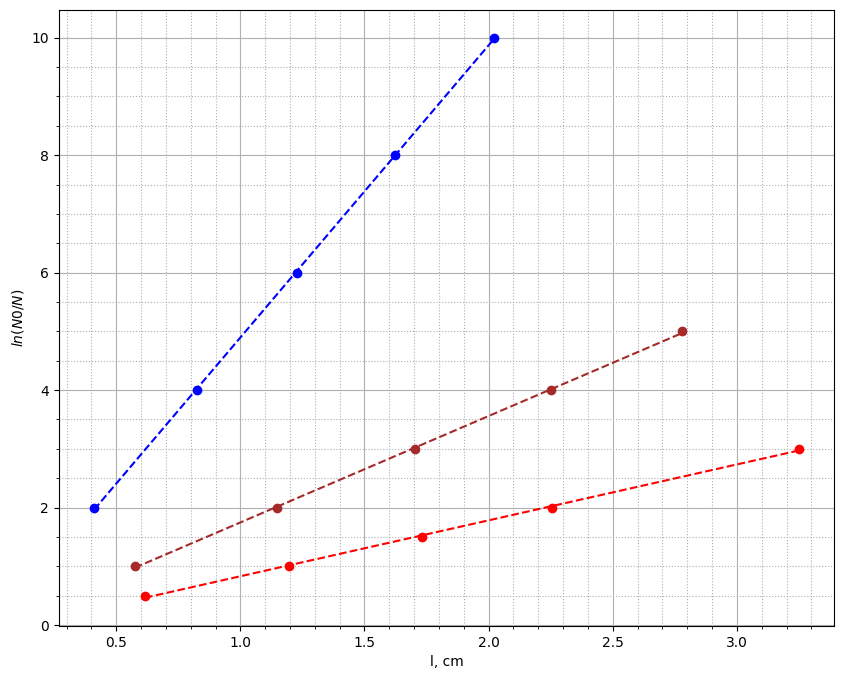

In [47]:
ax = prepare_plot("l, cm", "$ln(N0 / N)$")
drow_line(ax, DF_al['ln(N0/N)'], DF_al['L'], 0, 0, "blue")
drow_line(ax, DF_fe['ln(N0/N)'], DF_fe['L'], 0, 0, "red")
drow_line(ax, DF_pb['ln(N0/N)'], DF_pb['L'], 0, 0, "brown")